## 2D 직선 RANSAC

### RANSAC 2D Class

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

# RANSAC 2D Class

class RANSAC_2D_Class:
    def __init__(self, iter_max, offset):
        self.iter_max = iter_max
        self.offset = offset
        
        self.inputData = list()
        self.inliner_max = 0
        self.ransac_line = list()
        
        self.time = np.linspace(0, 100, 100)
        
    def setData(self, inputData):
        self.inputData = inputData
        
    def getRANSAC(self):
        return self.ransac_line
    
    # Select the points randomly
    def selectPoints(self):
        self.selectPoint = random.sample(self.inputData, 2)
        
    def makeHypothesisLine(self):
        point1 = list()
        point2 = list()

        # Process the equation
        for i, data in enumerate(self.inputData):
            if(data == self.selectPoint[0]):
                point1 = [i, data]

            if(data == self.selectPoint[1]):
                point2 = [i, data]

        # y = ax + b
        inclination = (point2[1] - point1[1]) / (point2[0] - point1[0])
        b = point1[1] - inclination*point1[0]

        hyp_line = (inclination * self.time) + b

        # y = ax + b + offset
        # y = ax + b - offset
        hyp_line_up = (inclination * self.time) + b + self.offset
        hyp_line_down = (inclination * self.time) + b - self.offset

        # Calculate the number of the inliner counts
        inliner_cnt = 0

        for i in range(len(hyp_line)):
            if((hyp_line_up[i] > self.inputData[i]) and (hyp_line_down[i] < self.inputData[i])):
                inliner_cnt = inliner_cnt + 1

        # Calculate the maximum inliner counts for finding the best model
        if(self.inliner_max < inliner_cnt):
            self.inliner_max = inliner_cnt
            self.ransac_line = hyp_line
        
    def processRANSAC(self):
        for iteration in range(self.iter_max):
            self.selectPoints()
            self.makeHypothesisLine()
    
    


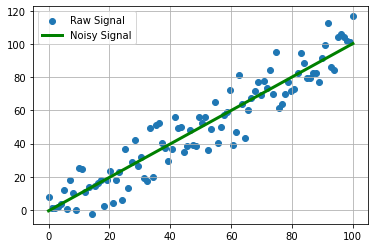

In [4]:
# Input Data
time = np.linspace(0, 100, 100)
a = 1

noise = np.random.normal(0,10,100)

y = np.array(a * time)
y_noisy = np.array((a * time) + noise)

y = y.tolist()
y_noisy = y_noisy.tolist()

############################################
############################################

# Process the RANSAC
iter_max = 1000
bias = 10
ransac = RANSAC_2D_Class(iter_max, bias)

ransac.setData(y_noisy);
ransac.processRANSAC()
ransac_line = ransac.getRANSAC()

# Visualization
# plt.scatter(time, y)
plt.scatter(time, y_noisy)
plt.plot(time, ransac_line, 'g', linewidth=3)

plt.grid()
plt.legend(['Raw Signal', 'Noisy Signal', 'RANSAC Line'])
plt.show()

## 3D 평면 RANSAC

### RANSAC 3D Class

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sklearn import preprocessing

# RANSAC 3D Class

class RANSAC_3D_Class:
    def __init__(self, iter_max, offset):
        self.iter_max = iter_max
        self.offset = offset
        
        self.inliner_max = 0
        self.ransac_plane = list()
        
        self.x = 0
        self.y = 0
        self.z = 0
        
        self.x_select = 0
        self.y_select = 0
        self.z_select = 0
        
    def setData(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        
    def getRANSAC(self):
        return self.ransac_plane
    
    # 1. Select the points randomly
    def selectPoints(self):
        self.x_select = random.sample(self.x.tolist(), 3)
        self.y_select = random.sample(self.y.tolist(), 3)
        self.z_select = random.sample(self.z.tolist(), 3)
    
    def makeHypothesisPlane(self):
        # 2. Plane equation
        point1 = np.array([self.x_select[0], self.y_select[0], self.z_select[0]])
        point2 = np.array([self.x_select[1], self.y_select[1], self.z_select[1]])
        point3 = np.array([self.x_select[2], self.y_select[2], self.z_select[2]])

        v12 = point2 - point1
        v13 = point3 - point1

        n = np.cross(v12, v13)
        d = -np.inner(n, point1)

        # Plane equation
        X = np.arange(-300, 300, 10)
        Y = np.arange(-300, 300, 10)
        X, Y = np.meshgrid(X, Y)
        Z = (-n[0]/n[2] * X) + (-n[1]/n[2] * Y) - d/n[2]

        # 3. Calculate the number of the inliner points
        inliner_cnt = 0

        for i in range(len(z)):

            check_z_upper = (-n[0]/n[2] * x[i]) + (-n[1]/n[2] * y[i]) - d/n[2] + self.offset
            check_z_lower = (-n[0]/n[2] * x[i]) + (-n[1]/n[2] * y[i]) - d/n[2] - self.offset

            if(z[i] < check_z_upper and z[i] > check_z_lower):
                inliner_cnt = inliner_cnt + 1

        # 4. Find the maximum inliner points
        if(self.inliner_max < inliner_cnt):
            self.inliner_max = inliner_cnt
            self.ransac_plane = Z
        
    def processRANSAC(self):
        for iteration in range(self.iter_max):
            self.selectPoints()
            self.makeHypothesisPlane()
            

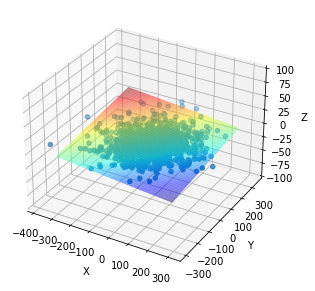

In [7]:
x = np.random.normal(0,100,1000)
y = np.random.normal(0,100,1000)
z = np.random.normal(0,10,1000)

###########################################################

# Process the RANSAC
iter_max = 100
offset = 1

ransac = RANSAC_3D_Class(iter_max, offset)

ransac.setData(x,y,z);
ransac.processRANSAC()
ransac_plane = ransac.getRANSAC()


X = np.arange(-300, 300, 10)
Y = np.arange(-300, 300, 10)
X, Y = np.meshgrid(X, Y)
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, cmap=cm.jet)
ax.plot_surface(X, Y, ransac_plane, rstride=1, cstride=1, alpha=0.5, cmap=cm.jet)

# Limit
ax.axes.set_zlim3d(bottom = -100, top = 100) 

# Label
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.rcParams['figure.figsize'] = [5.0, 5.0]
plt.show()